In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

serie = []
f = open("SerieDeTiempoUniforme.txt", "r")
a = f.read()
valores = a.split(',')

for i in valores:
    if i == "":
        serie.append(1)
    else:
        serie.append(int(i))
        
f.close()

In [2]:
def Transformar_a_Gaussiana(datos):
    datos_transformados = []
    for i in range(0, len(datos)-1, 2):
        u1 = datos[i]
        u2 = datos[i+1]
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        datos_transformados.append(z0)
        datos_transformados.append(z1)
    return datos_transformados

def Transformar_a_Gamma(datos, alpha, betta):
    datos_transformados = np.zeros(len(datos))
    for i in range(alpha):
        datos = np.array(datos)
        datos = np.clip(datos, 1e-10, 1)
        aux = -np.log(1 - datos + 1e-10) / betta
        datos_transformados += aux
    return datos_transformados

In [3]:
datos_uniformes = np.array(serie)

# Normalizar los datos uniformemente distribuidos al intervalo [0, 1]
datos_uniformes_normalizados = (datos_uniformes - 1) / 999

# Aplicar la función inversa de la CDF de la distribución gaussiana estándar y gamma
datos_gaussiana = Transformar_a_Gaussiana(datos_uniformes_normalizados)
datos_gamma = Transformar_a_Gamma(datos_uniformes_normalizados,1,2)

f1 = open("SerieDeTiempoGauss.txt", "w")
for i in datos_gaussiana:
    f1.write(str(i)+",")
f1.close()

f2 = open("SerieDeTiempoGamma.txt", "w")
for i in datos_gamma:
    f2.write(str(i)+",")
f2.close()

# Verificar la media y desviación estándar de los datos transformados
media_transformada_gauss = np.mean(datos_gaussiana)
desviacion_estandar_transformada_gauss = np.std(datos_gaussiana)
media_transformada_gamma = np.mean(datos_gamma)
desviacion_estandar_transformada_gamma = np.std(datos_gamma)
print("Media de los datos transformados a Gaussiana es:", media_transformada_gauss)
print("Desviación estándar de los datos transformados a Gaussiana es:", desviacion_estandar_transformada_gauss)
print("Media de los datos transformados a Gamma es:", media_transformada_gamma)
print("Desviación estándar de los datos transformados a Gamma es:", desviacion_estandar_transformada_gamma)

Media de los datos transformados a Gaussiana es: -0.005462470107963867
Desviación estándar de los datos transformados a Gaussiana es: 0.9976703748094239
Media de los datos transformados a Gamma es: 0.5121548311184352
Desviación estándar de los datos transformados a Gamma es: 0.6414693798839324


In [74]:
intervalo_sturges = int(math.log2(n))
s = np.std(datos_uniformes)
intervalo_scott = int((3.5 * s * n ** (-1/3)))
serieord = sorted(datos_uniformes)
lista1 = serieord[1:5000]
lista2 = serieord[5001:n]
upp = sum(lista2)/len(lista2)
low = sum(lista1)/len(lista1)
intervalo_freedmandiaconis = int(2*(upp - low)/(n ** (1/3)))

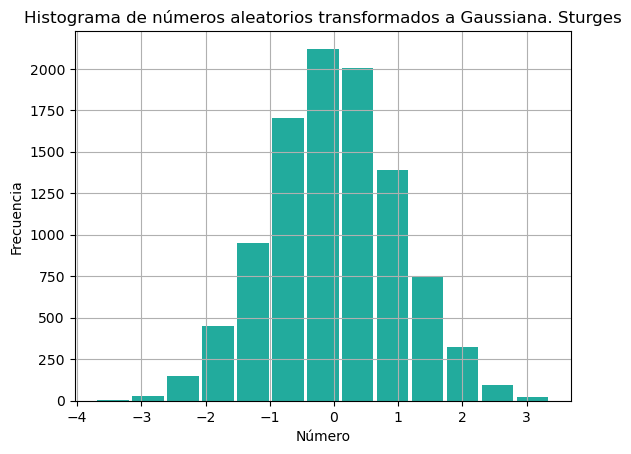

In [75]:
plt.hist(datos_gaussiana,intervalo_sturges,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gaussiana. Sturges')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

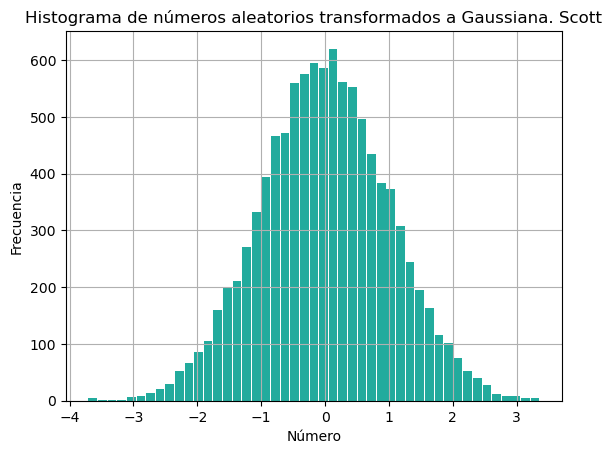

In [76]:
plt.hist(datos_gaussiana,intervalo_scott,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gaussiana. Scott')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

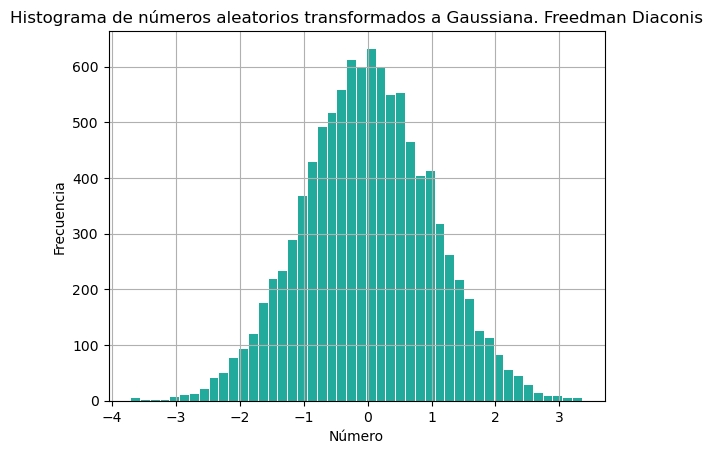

In [77]:
plt.hist(datos_gaussiana,intervalo_freedmandiaconis,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gaussiana. Freedman Diaconis')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

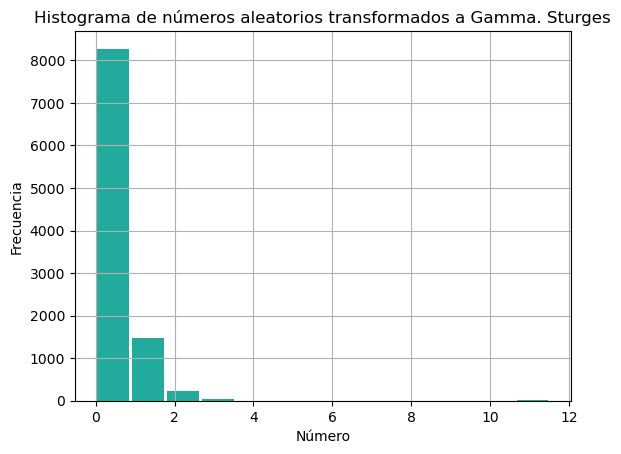

In [78]:
plt.hist(datos_gamma,intervalo_sturges,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gamma. Sturges')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

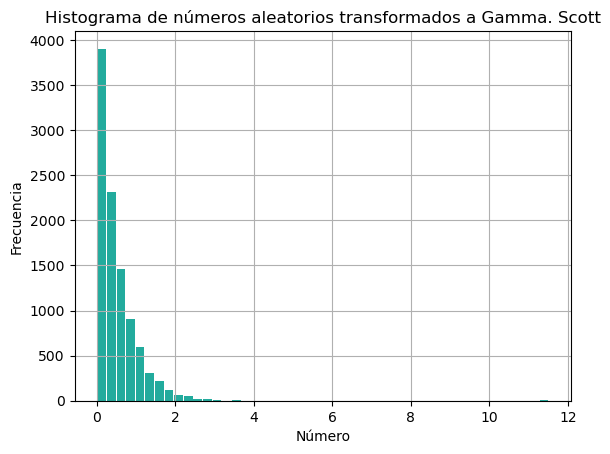

In [79]:
plt.hist(datos_gamma,intervalo_scott,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gamma. Scott')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

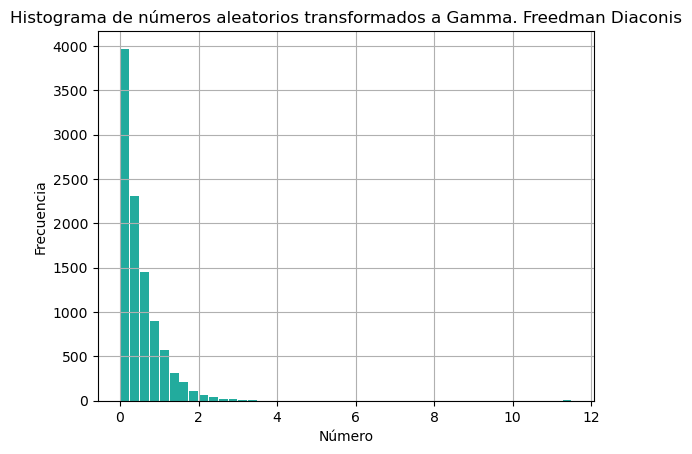

In [80]:
plt.hist(datos_gamma,intervalo_freedmandiaconis,color='#22AB9D', rwidth=0.90);
plt.title('Histograma de números aleatorios transformados a Gamma. Freedman Diaconis')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()